In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [5]:
img = image.load_imgr(r"C:\Users\sreehari\Downloads\basedata-20210125T154907Z-001\basedata\training\grave\image--011.jpg")


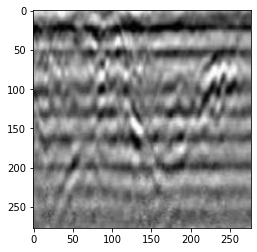

In [6]:
plt.imshow(img)


In [7]:
cv2.imread(r"C:\Users\sreehari\Downloads\basedata-20210125T154907Z-001\basedata\training\grave\image--011.jpg")

array([[[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [137, 137, 137],
        [134, 134, 134],
        [132, 132, 132]],

       [[236, 236, 236],
        [235, 235, 235],
        [233, 233, 233],
        ...,
        [133, 133, 133],
        [130, 130, 130],
        [129, 129, 129]],

       [[232, 232, 232],
        [231, 231, 231],
        [229, 229, 229],
        ...,
        [125, 125, 125],
        [122, 122, 122],
        [121, 121, 121]],

       ...,

       [[118, 118, 118],
        [111, 111, 111],
        [103, 103, 103],
        ...,
        [129, 129, 129],
        [131, 131, 131],
        [131, 131, 131]],

       [[119, 119, 119],
        [112, 112, 112],
        [103, 103, 103],
        ...,
        [143, 143, 143],
        [145, 145, 145],
        [146, 146, 146]],

       [[120, 120, 120],
        [112, 112, 112],
        [102, 102, 102],
        ...,
        [151, 151, 151],
        [153, 153, 153],
        [155, 155, 155]]

In [8]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [11]:
train_dataset = train.flow_from_directory(r"C:\Users\sreehari\Downloads\basedata-20210125T154907Z-001\basedata\training",
                                          target_size=(200,200),batch_size =5,class_mode = 'binary')

validation_dataset = train.flow_from_directory(r"C:\Users\sreehari\Downloads\basedata-20210125T154907Z-001\basedata\validation",
                                          target_size=(200,200),batch_size =5,class_mode = 'binary')


Found 92 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [12]:
train_dataset.class_indices

{'grave': 0, 'non_grave': 1}

In [13]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation='relu'),

                                    tf.keras.layers.Dense(1,activation='sigmoid')

                                    
])


In [15]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [16]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=50,
                      validation_data= validation_dataset)


Epoch 1/50
5/5 [==============================] - 7s 1s/step - loss: 3.0940 - accuracy: 0.7788 - val_loss: 1.3361 - val_accuracy: 0.4348
Epoch 2/50
5/5 [==============================] - 3s 652ms/step - loss: 0.8107 - accuracy: 0.4572 - val_loss: 1.2428 - val_accuracy: 0.4348
Epoch 3/50
5/5 [==============================] - 3s 649ms/step - loss: 0.9138 - accuracy: 0.5271 - val_loss: 0.6861 - val_accuracy: 0.6087
Epoch 4/50
5/5 [==============================] - 3s 637ms/step - loss: 0.7361 - accuracy: 0.7072 - val_loss: 0.6780 - val_accuracy: 0.5870
Epoch 5/50
5/5 [==============================] - 3s 644ms/step - loss: 0.6943 - accuracy: 0.4791 - val_loss: 0.6794 - val_accuracy: 0.6739
Epoch 6/50
5/5 [==============================] - 3s 632ms/step - loss: 0.6805 - accuracy: 0.5250 - val_loss: 0.6627 - val_accuracy: 0.5652
Epoch 7/50
5/5 [==============================] - 3s 646ms/step - loss: 0.6917 - accuracy: 0.5525 - val_loss: 0.6756 - val_accuracy: 0.4891
Epoch 8/50
5/5 [=======

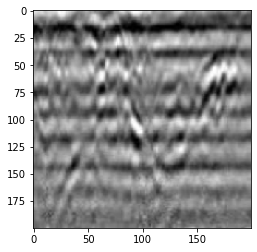

Grave


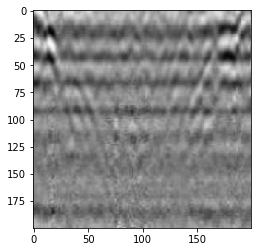

Grave


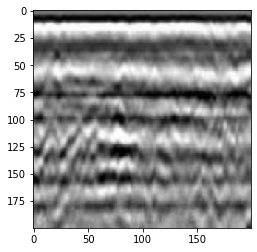

Grave


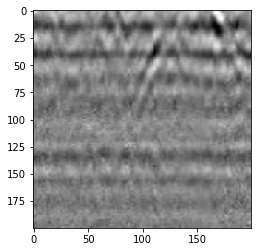

Grave


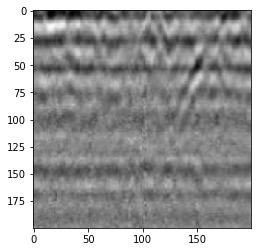

Grave


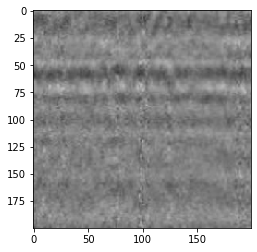

Non grave


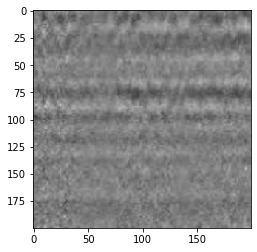

Non grave


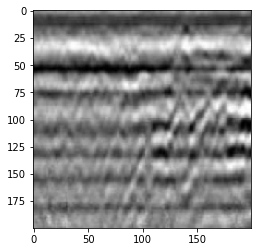

Grave


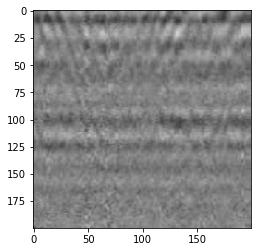

Grave


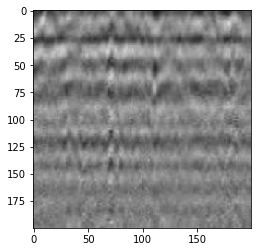

Grave


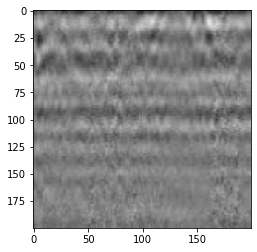

Non grave


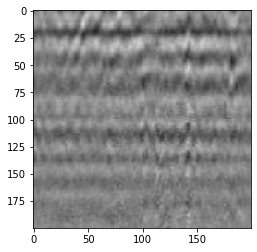

Grave


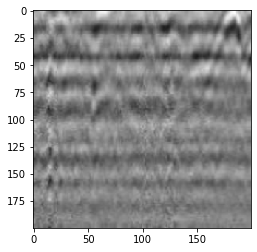

Grave


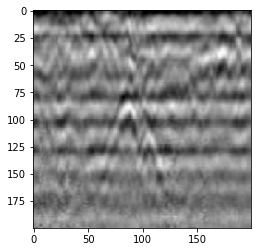

Grave


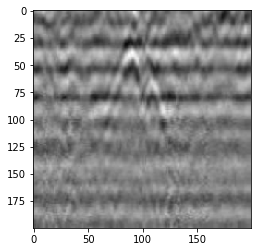

Grave


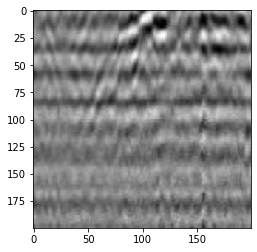

Grave


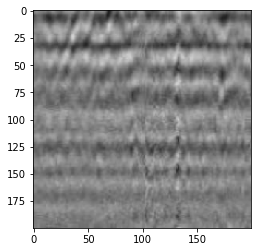

Grave


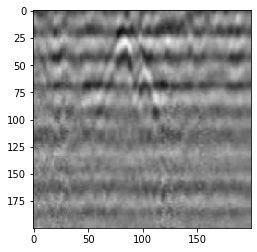

Grave


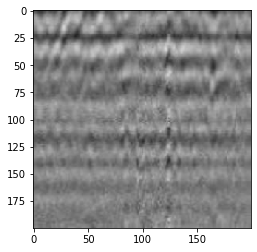

Grave


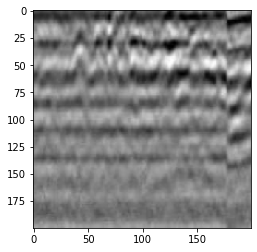

Grave


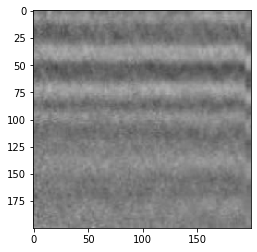

Non grave


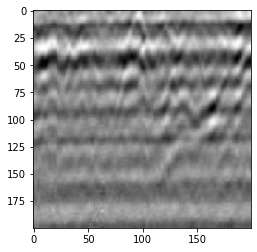

Grave


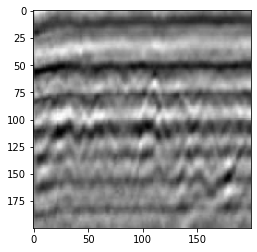

Grave


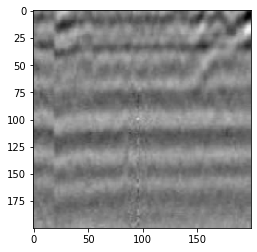

Grave


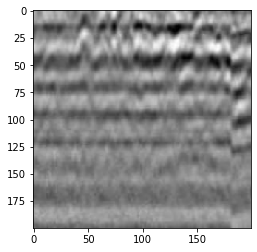

Grave


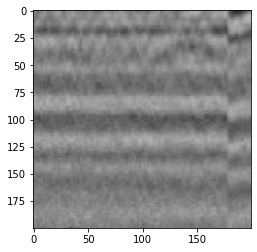

Non grave


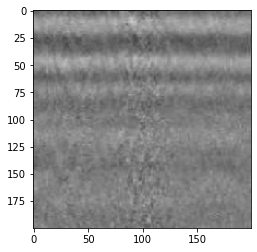

Non grave


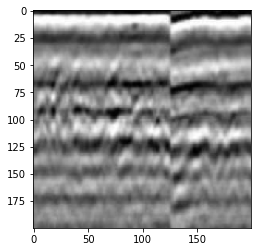

Grave


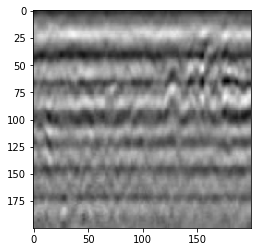

Grave


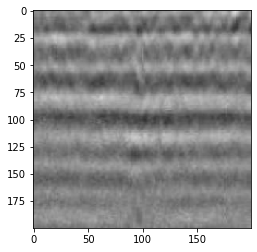

Grave


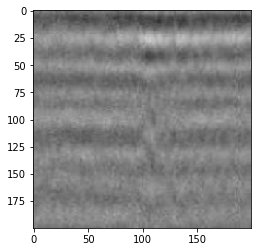

Non grave


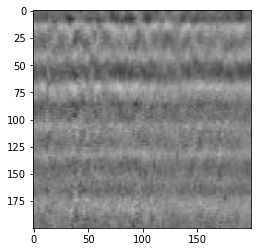

Non grave


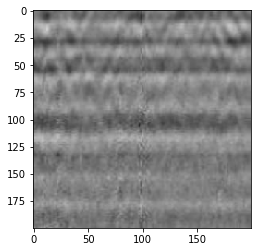

Non grave


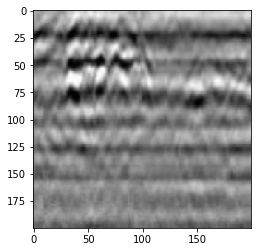

Grave


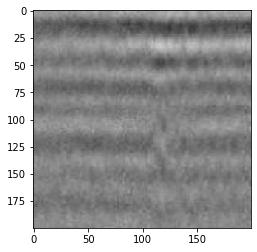

Non grave


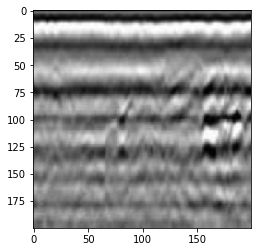

Grave


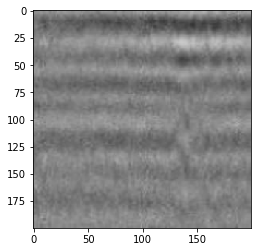

Non grave


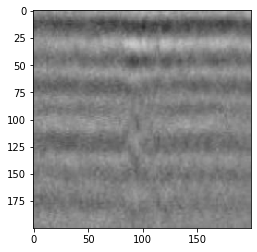

Non grave


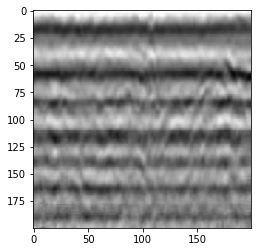

Grave


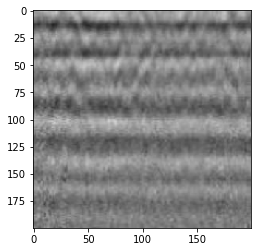

Non grave


In [19]:
dir_path =r"C:\Users\sreehari\Downloads\basedata-20210125T154907Z-001\basedata\testing\grave" 
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print("Grave")
  else:
    print("Non grave")
